# Modeling Driven Damped Oscillation Motion with Experimental Data and Computational Model

In [41]:
# Import Libraries
import pandas as pd
import math
import numpy as np
from Unit0 import model_utils
import statistics

In [42]:
# Constants
voltage = 2
resistance = 0.4
inductance = 0.01
capacitance = 0.00001
omega = 1

In [43]:
def compute_models(index):
    def compute_acceleration(t, current, current_prime, _current_double_prime):
        return voltage * omega * math.cos(omega * t) / inductance - resistance / inductance * current_prime - current / (inductance * capacitance)

    times = np.linspace(0, 10, 10000)
    _, positions, velocities, accelerations = model_utils.euler_method(compute_acceleration, times=times, position_initial=0)

    model_utils.graph("Current", "A", [(times, positions, "Computational")], f"Graphs/Current{index + 1}")

/var/folders/3z/rw5w8mxn1tz2n9r7c9q9jzrw0000gp/T/ipykernel_19121/4278830733.py:3: RuntimeWarning: overflow encountered in scalar divide
  return voltage * omega * math.cos(omega * t) / inductance - resistance / inductance * current_prime - current / (inductance * capacitance)


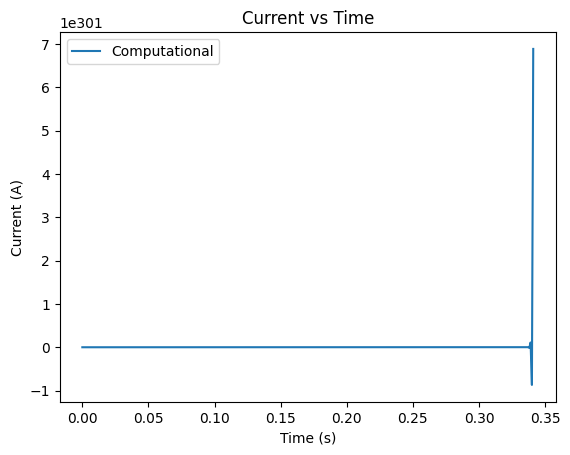

In [44]:
compute_models(0)